In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('D:\\expense-tracker-data-visualizer\\ExpenseTracker\\data\\expenses.csv')

In [4]:
print("Preview of Data")
print(df.head())

Preview of Data
         Date       Category       Description   Amount
0  2025-01-06  Entertainment             Movie  1447.61
1  2025-01-11         Travel              Fuel   902.51
2  2025-01-13         Health      Doctor visit   363.77
3  2025-01-14        Savings  Added to savings  1645.69
4  2025-01-15       Shopping               Bag  1053.54


In [8]:
print("\n Dataset Shape:",df.shape)

print("n Data Info: ")
print(df.info())

print("\n Summary Statistics:")
print(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())


 Dataset Shape: (20, 4)
n Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         20 non-null     object 
 1   Category     20 non-null     object 
 2   Description  20 non-null     object 
 3   Amount       20 non-null     float64
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes
None

 Summary Statistics:
            Amount
count    20.000000
mean    984.442000
std     540.172466
min     203.370000
25%     455.627500
50%     949.700000
75%    1443.485000
max    1887.100000

 Missing Values:
Date           0
Category       0
Description    0
Amount         0
dtype: int64


In [16]:
# 1 Total number of expenses records
print("\n Total Records:",len(df))

#2 Total money spent
print("Total Amount Spent:",df["Amount"].sum())

#3.Average spending per record
print("Average Spending per Transaction:", round(df['Amount'].mean(),2))

# unique expense cateogries
print("\n Unique Categories:")
print(df["Category"].unique())


 Total Records: 20
Total Amount Spent: 19688.84
Average Spending per Transaction: 984.44

 Unique Categories:
['Entertainment' 'Travel' 'Health' 'Savings' 'Shopping' 'Food'
 'Miscellaneous']


In [17]:
#Total spending by cateogry
category_expense = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)

print("\n Total spending by Category:")
print(category_expense)


 Total spending by Category:
Category
Shopping         6661.38
Entertainment    4529.37
Travel           3193.36
Miscellaneous    2110.79
Savings          2102.92
Food              727.25
Health            363.77
Name: Amount, dtype: float64


In [24]:
category_expense.to_csv("D:\\expense-tracker-data-visualizer\\ExpenseTracker\\data\\category_summary.csv")
print("\n📁 Category-wise summary saved to 'D:\\expense-tracker-data-visualizer\\ExpenseTracker\\data\\category_summary.csv'")



📁 Category-wise summary saved to 'D:\expense-tracker-data-visualizer\ExpenseTracker\data\category_summary.csv'


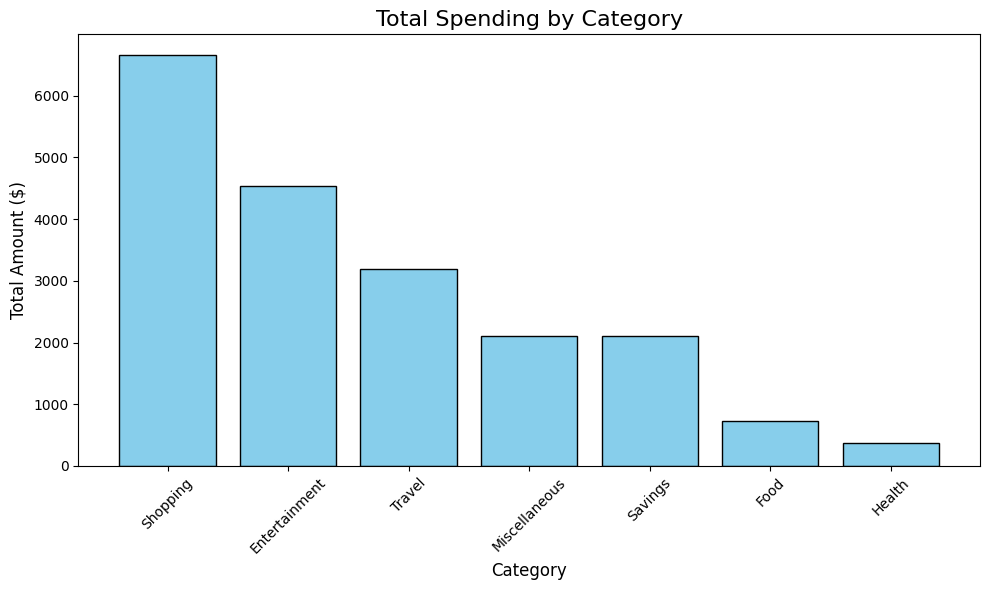

In [37]:
#Bar chart: Total spending by category
plt.figure(figsize=(10, 6))
plt.bar(category_expense.index, category_expense.to_numpy(), color='skyblue', edgecolor='black')

plt.title("Total Spending by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Amount ($)",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

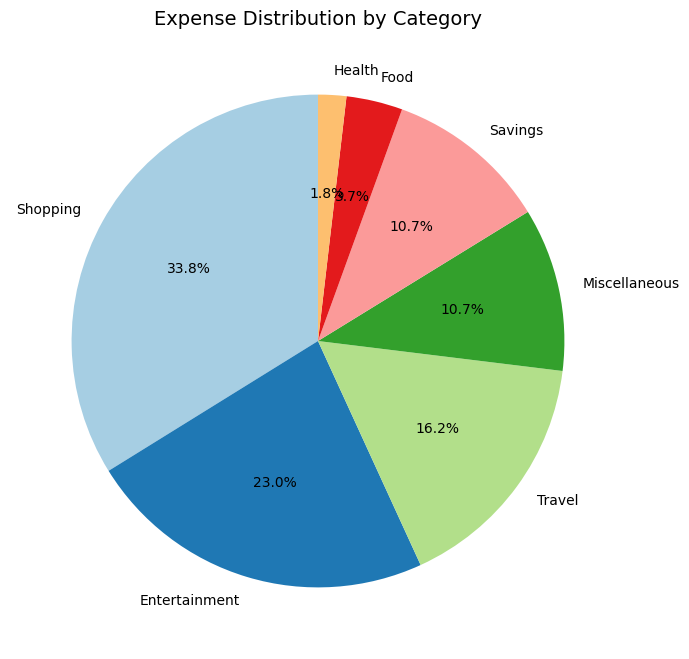

In [39]:
# Pie chart: Spending distribution
plt.figure(figsize=(8, 8))
plt.pie(category_expense.to_numpy(),
        labels=category_expense.index.tolist(),
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title("Expense Distribution by Category", fontsize=14)
plt.show()


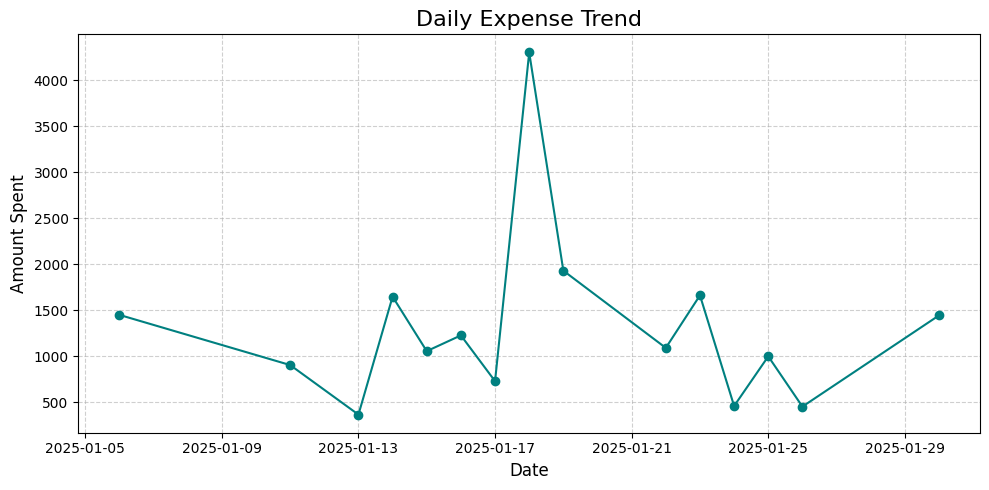

In [41]:
#Convert Date column to datetime type
df["Date"] = pd.to_datetime(df["Date"])

#Group by date
daily_expense = df.groupby("Date")["Amount"].sum()

#Line plot
plt.figure(figsize=(10,5))
plt.plot(daily_expense.index.to_numpy(), daily_expense.to_numpy(), marker='o', color='teal')
plt.title("Daily Expense Trend",fontsize=16)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Amount Spent",fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

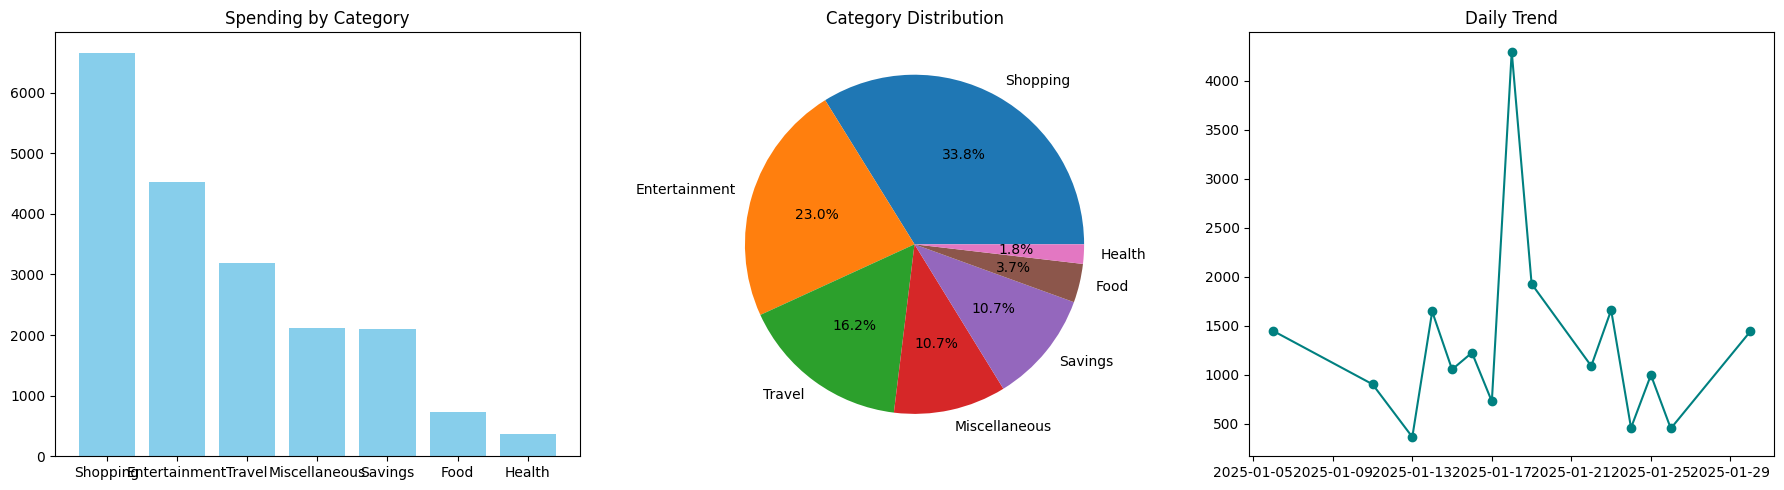

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar chart
axes[0].bar(category_expense.index, category_expense.values, color='skyblue')
axes[0].set_title("Spending by Category")

# Pie chart
axes[1].pie(category_expense.values, labels=category_expense.index, autopct='%1.1f%%')
axes[1].set_title("Category Distribution")

# Line chart
axes[2].plot(daily_expense.index, daily_expense.values, marker='o', color='teal')
axes[2].set_title("Daily Trend")

plt.tight_layout()
plt.show()
